# Plot velocities for each experiment

using GFDL exe from Dec 24

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm

from xgcm import Grid

In [3]:
basee = '/Users/claireyung/mom6/MOM6-examples/ocean_only/ISOMIP/seamount-icemount-PGtest-dec24/'
def open_files(label):
    base = basee 
    prog = xr.open_dataset(base + label+'/prog.nc')
    return prog
def open_IC(label):
    base = basee 
    IC = xr.open_dataset(base + label+'/MOM_IC.nc')
    return IC
def plot(ax,yy0,tt,variable,varname,vmin1,vmax1,cmap,ymax):
    prog = open_files(label)
    ocean_static = xr.open_dataset(label +'/ocean_geometry.nc')
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = label
    #IC = open_IC(label)
    depth = grid.interp(prog.e,"x")
    lon = ocean_static.geolonb
    dataplot = variable

    xx = lon
    if (varname == "uo") or (varname == "PFu") or (varname == "visc_rem_u"): 
        dataplot = grid.interp(dataplot,"x")
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) 
    xi, yyi = np.meshgrid(xx[yy0,:], yi) 
    #print(xi.shape)
    #print(yy[tt,...].shape)
    #print(dataplot[tt,:,yy0,:].shape)
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    if (varname == "uo"):
        cbar = plt.colorbar(cax, ax = ax, label = " ")
        cbar.formatter.set_powerlimits((0, 0))
        cbar.formatter.set_useMathText(True)
        cbar.ax.yaxis.set_offset_position('right')
        cbar.update_ticks()

    else:
        plt.colorbar(cax, ax = ax, label = varname)
    #plt.colorbar(cax, ax = ax, label = 'u (m/s)')
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    


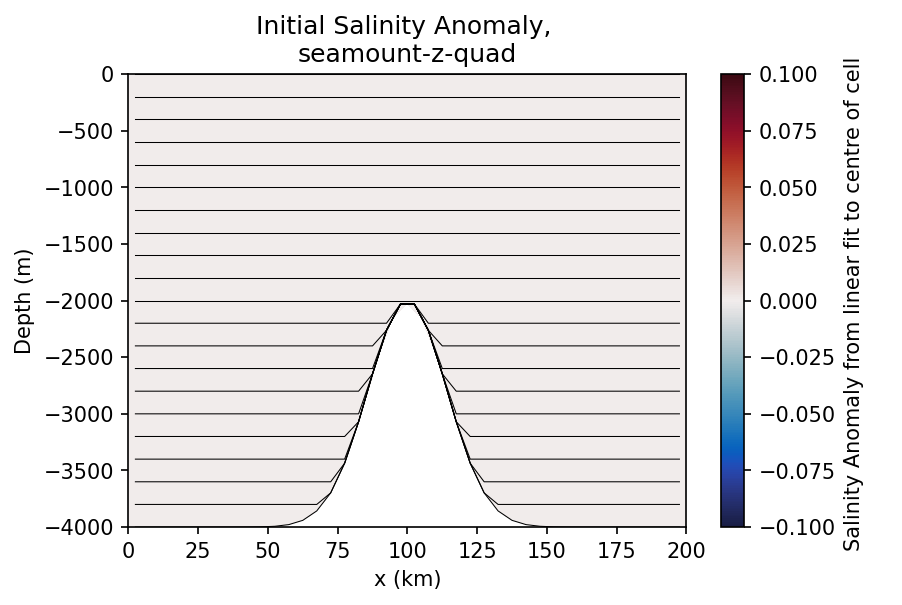

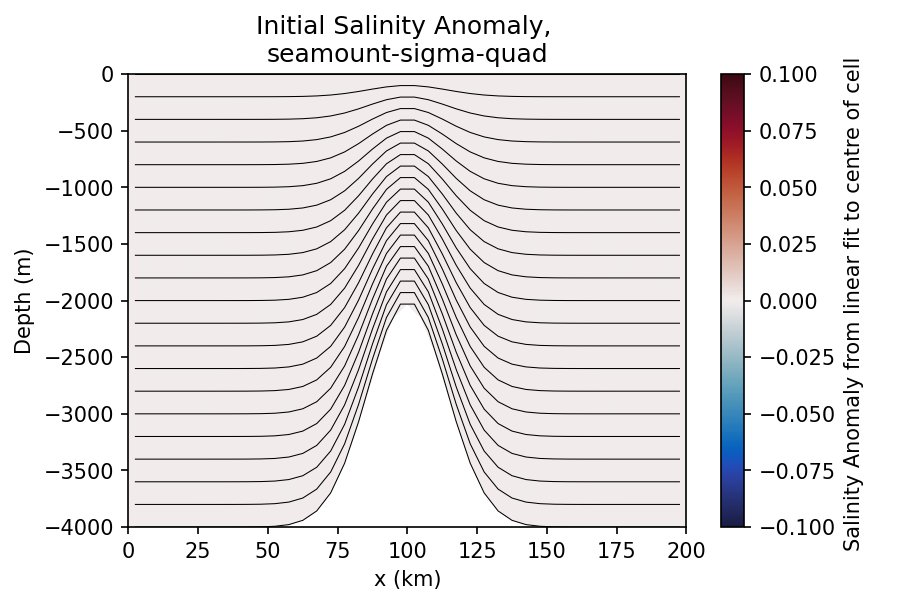

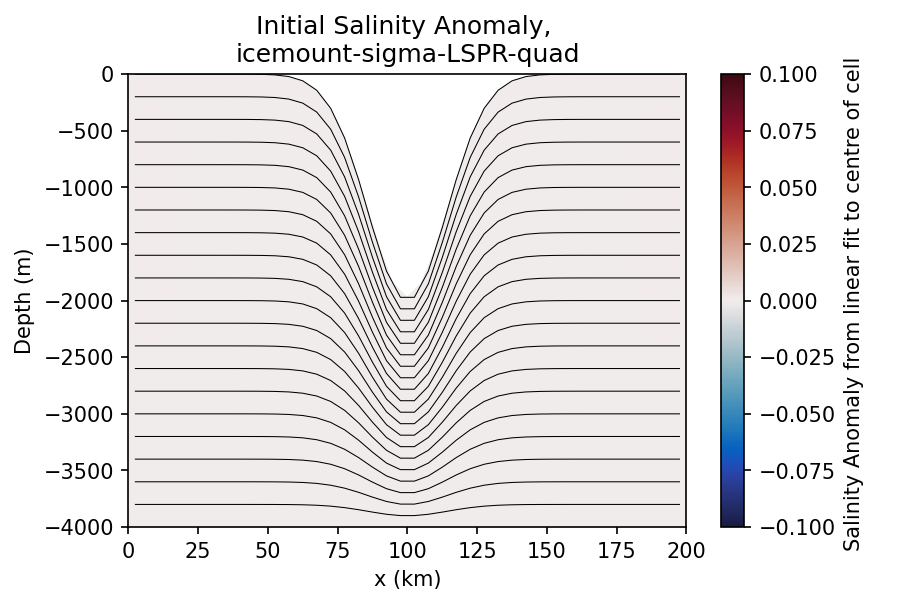

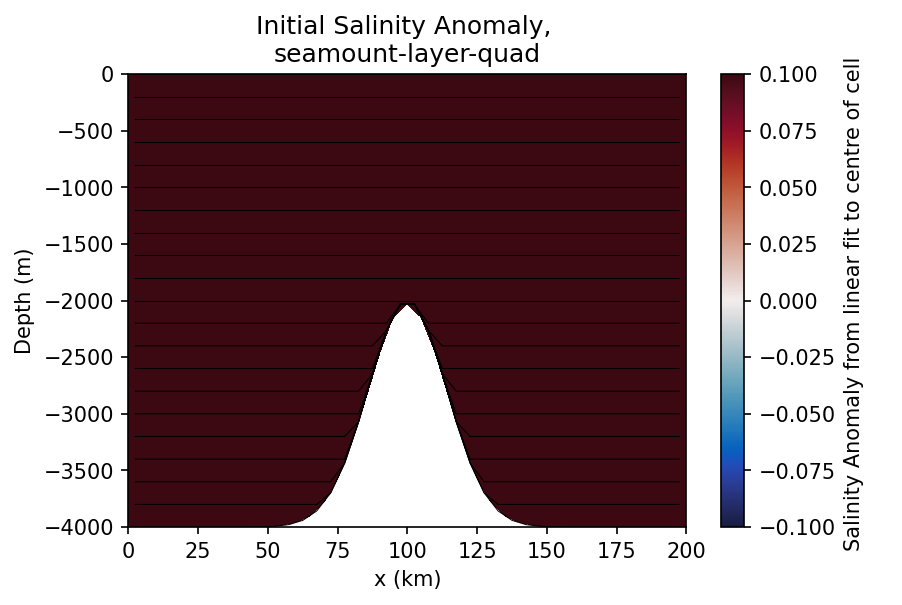

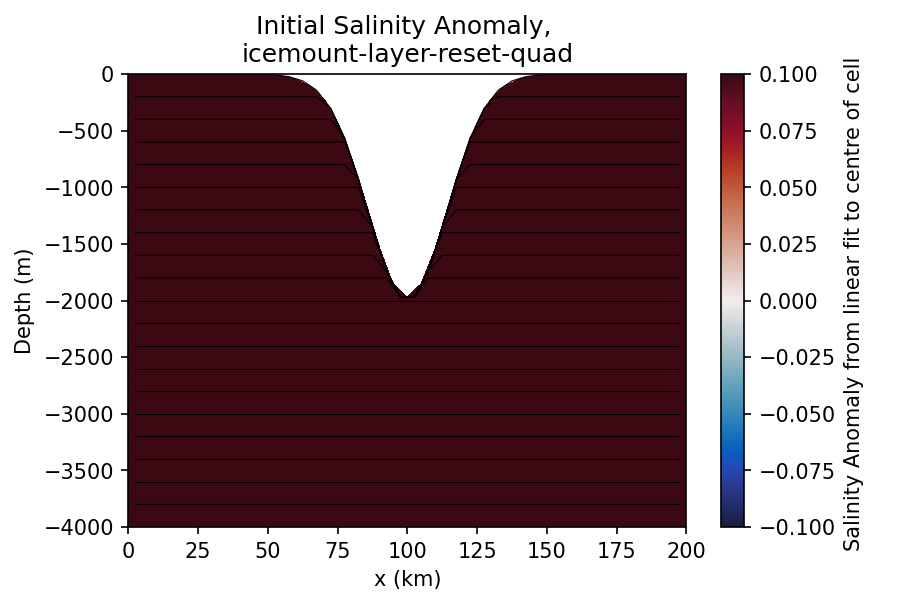

In [24]:
for label in ['seamount-z-quad','seamount-sigma-quad','icemount-sigma-LSPR-quad',
             'seamount-layer-quad','icemount-layer-reset-quad']:

    fig, axes = plt.subplots(dpi = 150)
    IC = open_IC(label)
    time = 0
    x = 0
    ymax = 4000
    
    ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) \
    + 33.8 + ((IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2+4000))/4000**2*0.85
    plot(axes,x,time,IC.Salt-ideal_salt,"Salinity Anomaly from linear fit to centre of cell \n",-1e-1,1e-1,cm.cm.balance,ymax)
    axes.set_title('Initial Salinity Anomaly, \n'+label)
    plt.show()


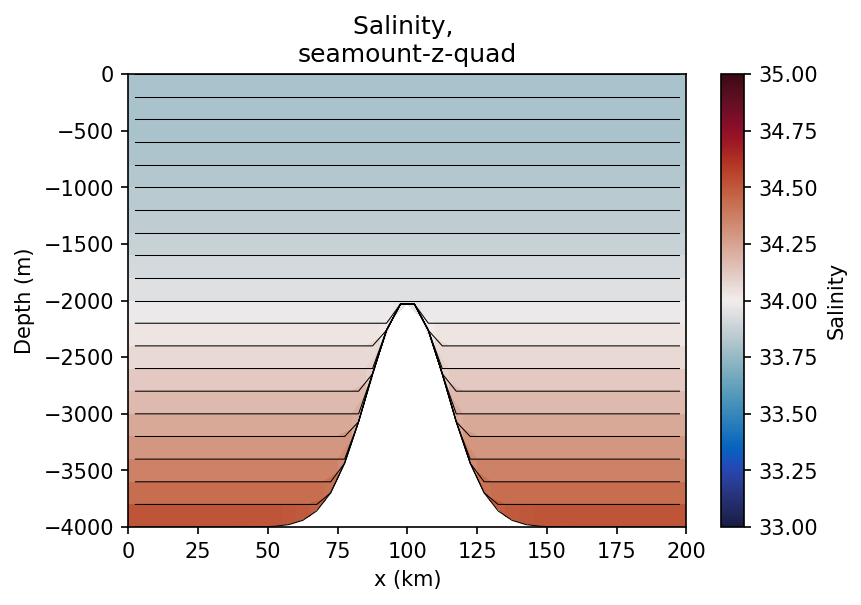

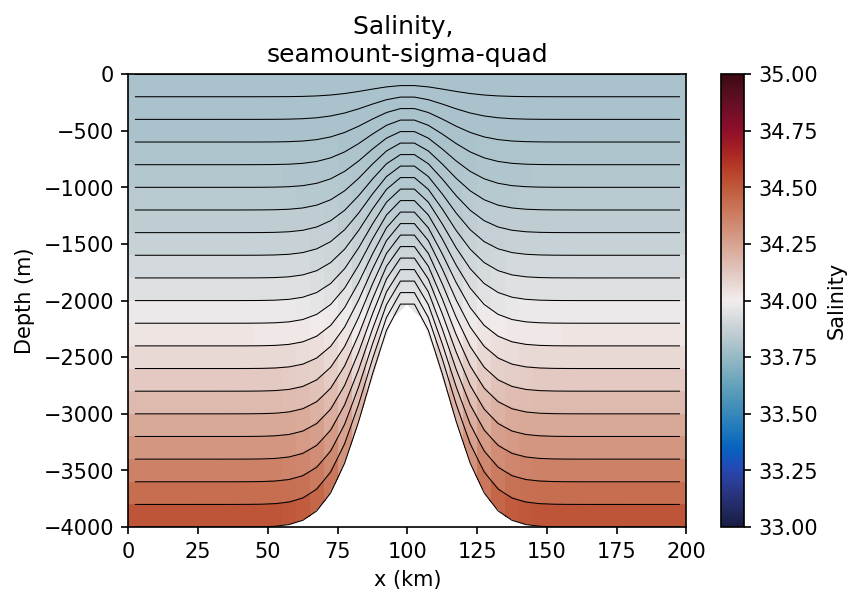

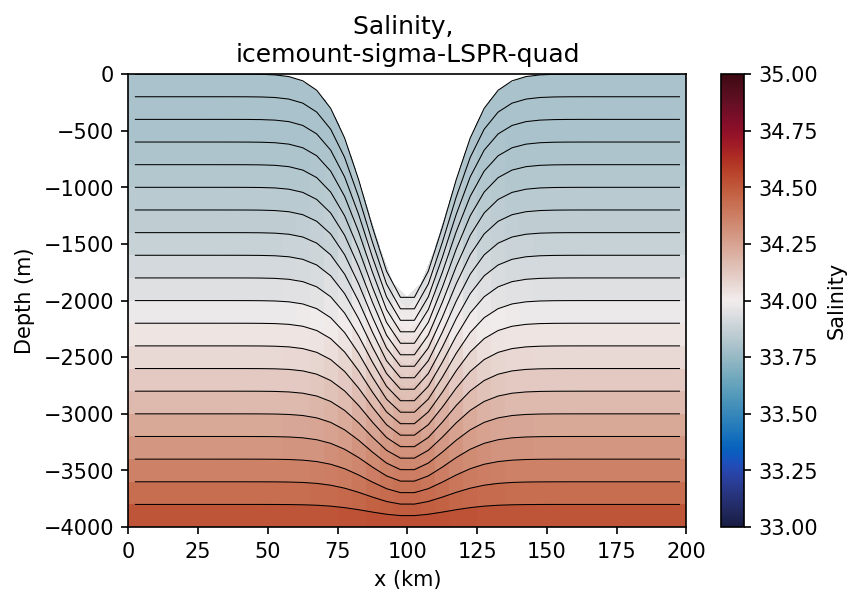

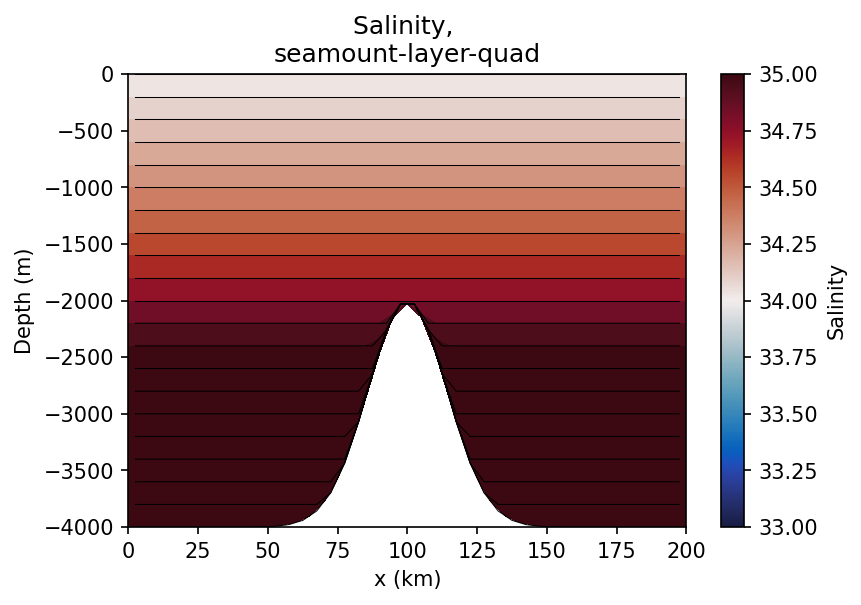

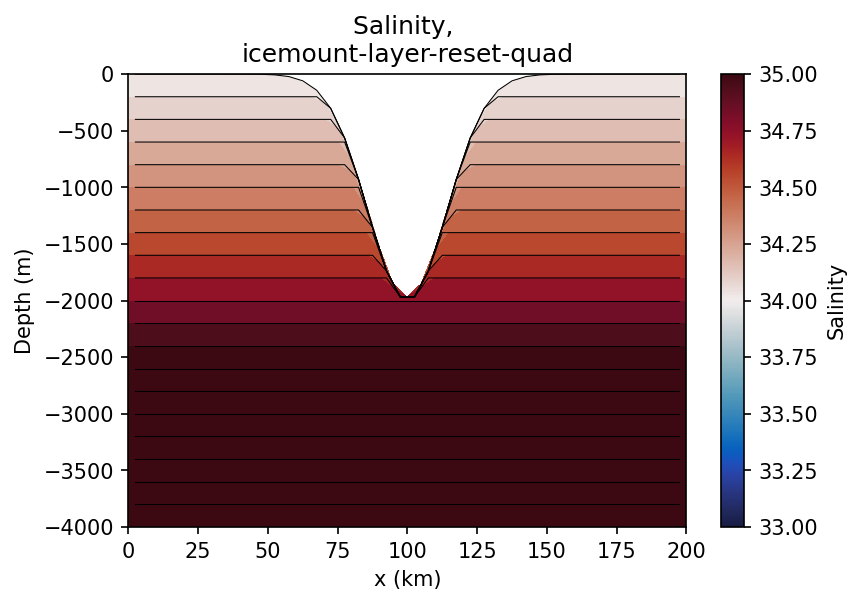

In [26]:
for label in ['seamount-z-quad','seamount-sigma-quad','icemount-sigma-LSPR-quad',
             'seamount-layer-quad','icemount-layer-reset-quad']:

    fig, axes = plt.subplots(dpi = 150)
    IC = open_IC(label)
    time = 0
    x = 0
    ymax = 4000
    
    #ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) \
    #+ 33.8 + ((IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2+4000))/4000**2*0.85
    plot(axes,x,time,IC.Salt,"Salinity",33,35,cm.cm.balance,ymax)
    axes.set_title('Salinity, \n'+label)
    plt.show()


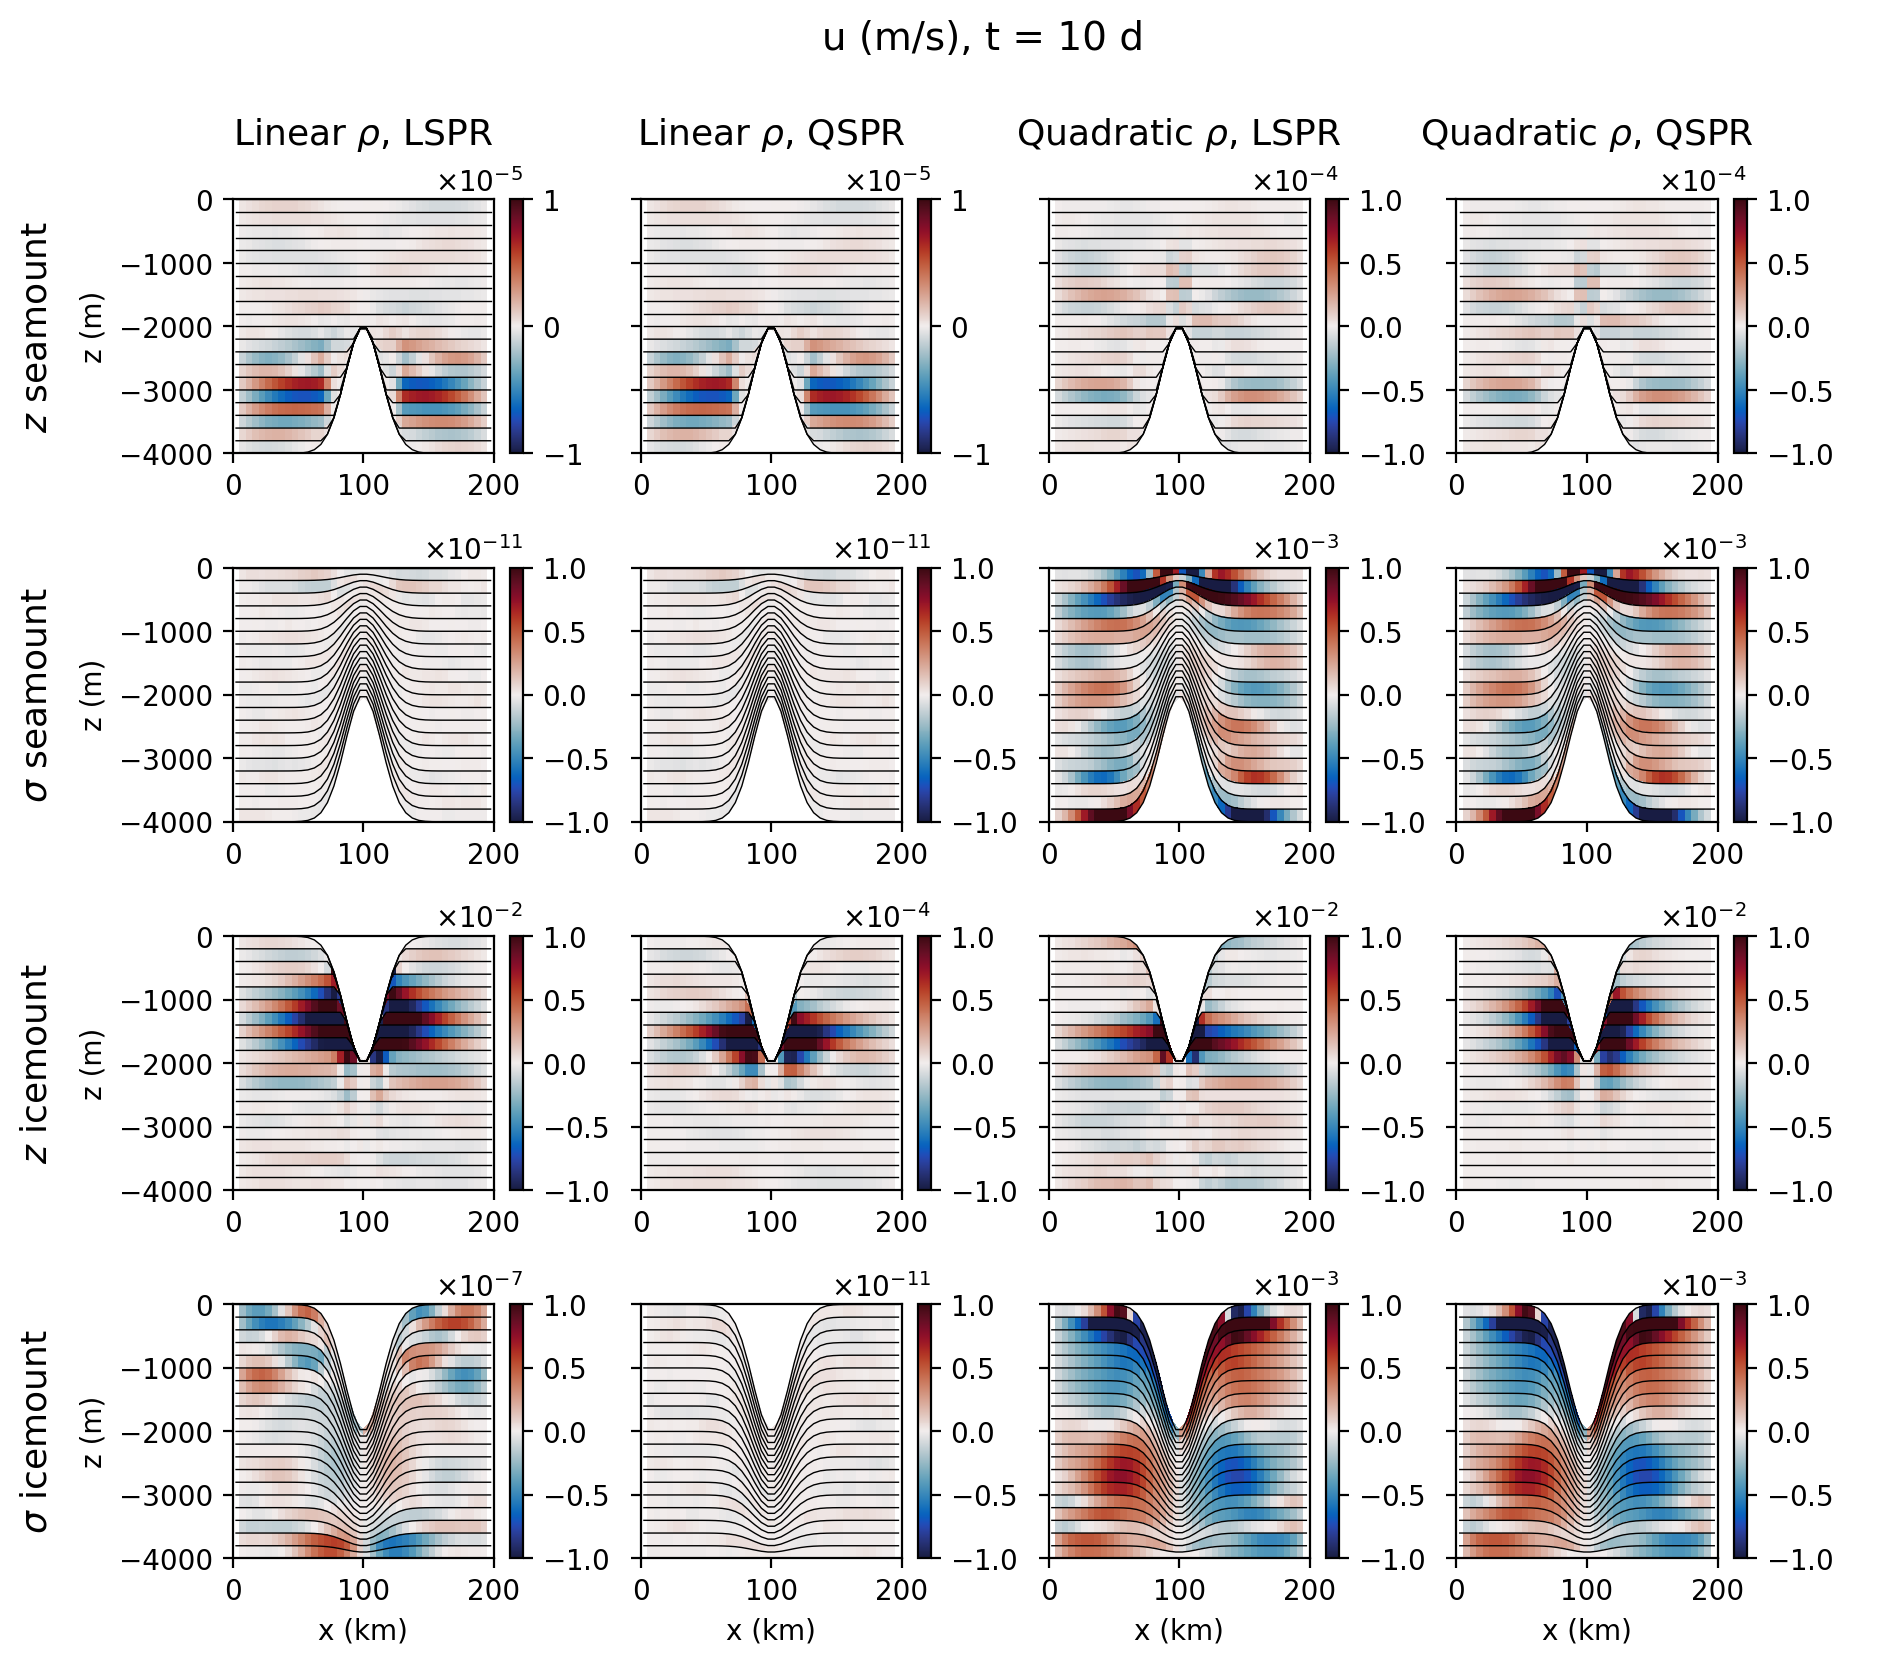

In [58]:
fig, axes = plt.subplots(ncols = 4, nrows = 4, figsize = (10,9),dpi = 200)
ax = np.ravel(axes)

for i in np.arange(16):

    label = ['seamount-z','seamount-z','seamount-z-quad','seamount-z-quad',
             'seamount-sigma','seamount-sigma','seamount-sigma-quad','seamount-sigma-quad',
              'icemount-z-LSPR','icemount-z-surfcorrect','icemount-z-LSPR-quad','icemount-z-surfcorrect-quad',
               'icemount-sigma-LSPR','icemount-sigma-surfcorrect','icemount-sigma-LSPR-quad','icemount-sigma-surfcorrect-quad'][i]
    loc = i
    vmax = [1e-5,1e-5,1e-4,1e-4,
            1e-11,1e-11,1e-3,1e-3,
            1e-2,1e-4,1e-2,1e-2,
            1e-7,1e-11,1e-3,1e-3,][i]
    
    a = ax[loc]

    prog = open_files(label)
    x = 0
    ymax = 4000

    plot(a,x,-1,prog.u,"uo",-vmax,vmax,cm.cm.balance,ymax)

    a.set_title('')
    if loc < 12:
        a.set_xlabel('')
    if (loc ==0) or (loc ==4) or (loc ==8) or (loc ==12):
        a.set_ylabel('z (m)')
        a.text(-150,-2000,[r'$z$ seamount',r'$\sigma$ seamount',r'$z$ icemount',r'$\sigma$ icemount'][int(loc/4)],
               ha = 'center', va = 'center',rotation = 90, fontsize = 13)
    else:
        a.set_ylabel('')
        a.set_yticklabels('')
        
    if loc < 4:
        a.set_title([r'Linear $\rho$, LSPR',r'Linear $\rho$, QSPR',r'Quadratic $\rho$, LSPR',r'Quadratic $\rho$, QSPR'][loc], 
                    y = 1.15, fontsize = 13)
fig.subplots_adjust(wspace = 0.25,hspace = 0.45)
fig.suptitle('u (m/s), t = 10 d', fontsize = 14, y = 0.98)



plt.show()


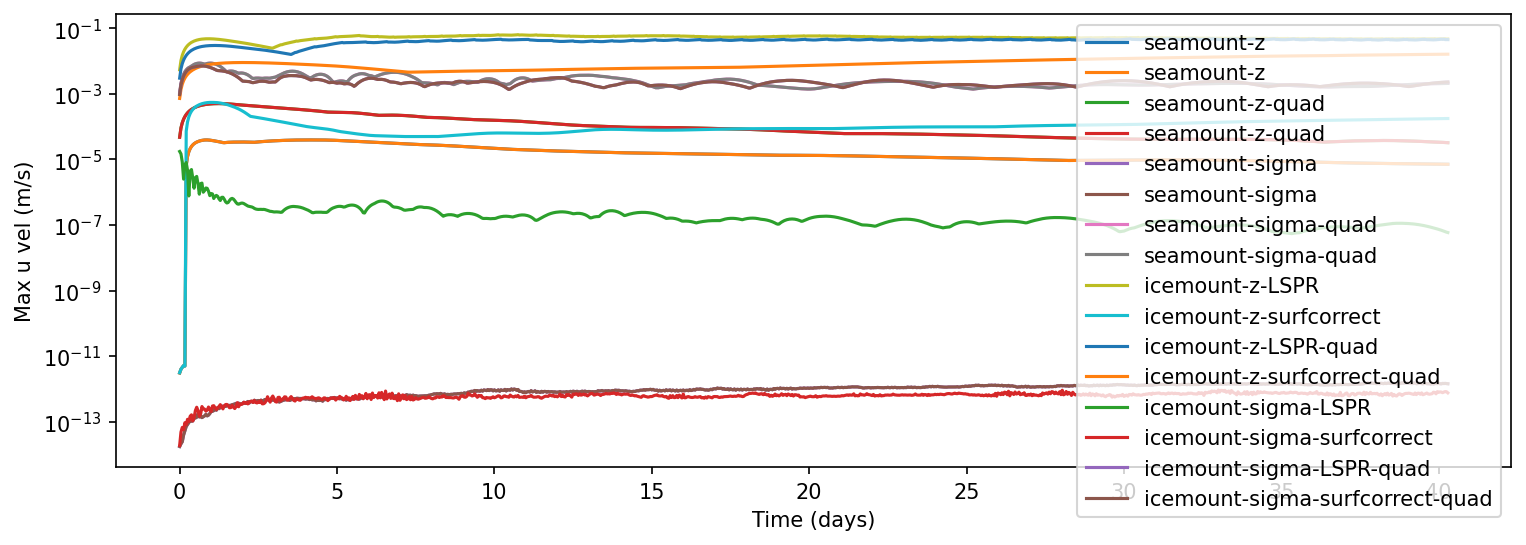

In [32]:
fig, axes = plt.subplots(figsize = (12,4),dpi = 150)

for label in ['seamount-z','seamount-z','seamount-z-quad','seamount-z-quad',
             'seamount-sigma','seamount-sigma','seamount-sigma-quad','seamount-sigma-quad',
              'icemount-z-LSPR','icemount-z-surfcorrect','icemount-z-LSPR-quad','icemount-z-surfcorrect-quad',
               'icemount-sigma-LSPR','icemount-sigma-surfcorrect','icemount-sigma-LSPR-quad','icemount-sigma-surfcorrect-quad']:


    prog = open_files(label)
    axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
                 label = label) 
axes.set_ylabel('Max u vel (m/s)')
axes.set_xlabel('Time (days)')
axes.set_yscale('log')
plt.legend(loc = 'upper right')

Low spurious currents for all except `icemount-z-surfcorrect` which has the problem that vanishing layers mess up the otherwise perfect surface pressure. This is fixed in `icemount-z-reset` with `MASS_WEIGHT_IN_PRESSURE_GRADIENT` implemented for ice shelves, and resetting the integral at a nonvanished and nonMWIPG affected layer.

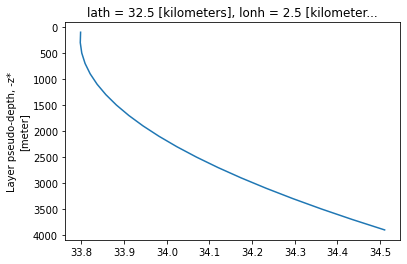

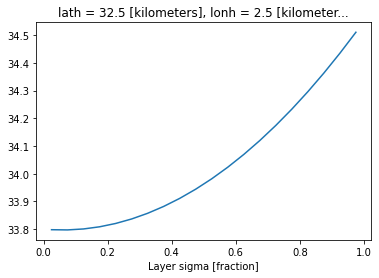

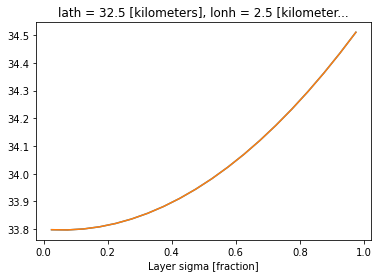

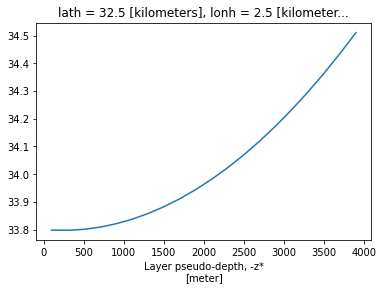

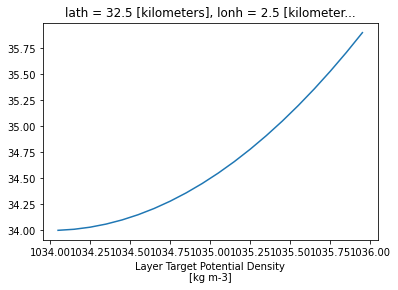

In [67]:
# make quadratic profile
IC = open_IC('seamount-z')
IC_S_COPY = IC.Salt.isel(lath = 0)+IC.Salt*0
middle_depth = IC.h.cumsum('Layer')-IC.h/2
IC_S_COPY = IC_S_COPY + 0.85*(middle_depth)*(middle_depth-4000)/4000**2
IC_S_COPY.isel(Time = 0, lath = 0, lonh = 0).plot(y = 'Layer',yincrease = False)
IC_S_COPY = IC_S_COPY.isel(Time = 0).rename('SALT')
ds_ICfile = xr.merge([IC_S_COPY.transpose("Layer","lath","lonh"), 
                      IC.Temp.isel(Time = 0).rename('PTEMP')]).drop('Time')
ds_ICfile.to_netcdf('INPUT/quadraticSaltseamountz.nc')
plt.show()

# make quadratic profile
IC = open_IC('seamount-sigma')
IC_S_COPY = IC.Salt.isel(lath = 0)+IC.Salt*0
middle_depth = IC.h.cumsum('Layer')-IC.h/2
IC_S_COPY = IC_S_COPY + 0.85*(middle_depth)*(middle_depth-4000)/4000**2
IC_S_COPY.isel(Time = 0, lath = 0, lonh = 0).plot()
IC_S_COPY = IC_S_COPY.isel(Time = 0).rename('SALT')
ds_ICfile = xr.merge([IC_S_COPY.transpose("Layer","lath","lonh"), 
                      IC.Temp.isel(Time = 0).rename('PTEMP')]).drop('Time')
ds_ICfile.to_netcdf('INPUT/quadraticSaltseamountsigma.nc')

plt.show()

# make quadratic profile
IC = open_IC('icemount-sigma-LSPR')
IC_S_COPY = IC.Salt#.isel(lath = 0)+IC.Salt*0
middle_depth = IC.h.cumsum('Layer')-IC.h/2 -IC.eta.isel(Interface = 0)
IC_S_COPY = IC_S_COPY + 0.85*(middle_depth)*(middle_depth-4000)/4000**2
IC_S_COPY.isel(Time = 0, lath = 0, lonh = 0).plot()
IC_S_COPY = IC_S_COPY.isel(Time = 0).rename('SALT')
ds_ICfile = xr.merge([IC_S_COPY.transpose("Layer","lath","lonh"), 
                      IC.Temp.isel(Time = 0).rename('PTEMP')]).drop('Time')
ds_ICfile.to_netcdf('INPUT/quadraticSalticemountsigma.nc')

# make quadratic profile
IC = open_IC('icemount-sigma-LSPR')
IC_S_COPY = IC.Salt.isel(lonh = 0)+IC.Salt*0
middle_depth = IC.h.cumsum('Layer')-IC.h/2 +IC.eta.isel(Interface = 0)
IC_S_COPY = IC_S_COPY + 0.85*(middle_depth.isel(lonh = 0))*(middle_depth.isel(lonh = 0)-4000)/4000**2
IC_S_COPY.isel(Time = 0, lath = 0, lonh = 0).plot()
IC_S_COPY = IC_S_COPY.isel(Time = 0).rename('SALT')
ds_ICfile = xr.merge([IC_S_COPY.transpose("Layer","lath","lonh"), 
                      IC.Temp.isel(Time = 0).rename('PTEMP')]).drop('Time').isel(lonh = 0, lath = 0)
ds_ICfile.to_netcdf('INPUT/quadraticSalticemountsigma1D.nc')
plt.show()

# make quadratic profile
IC = open_IC('icemount-z-LSPR')
IC_S_COPY = IC.Salt.isel(lonh = 0)+IC.Salt*0
middle_depth = IC.h.cumsum('Layer')-IC.h/2 +IC.eta.isel(Interface = 0)
IC_S_COPY = IC_S_COPY + 0.85*(middle_depth.isel(lonh = 0))*(middle_depth.isel(lonh = 0)-4000)/4000**2
IC_S_COPY.isel(Time = 0, lath = 0, lonh = 0).plot()
IC_S_COPY = IC_S_COPY.isel(Time = 0).rename('SALT')
ds_ICfile = xr.merge([IC_S_COPY.transpose("Layer","lath","lonh"), 
                      IC.Temp.isel(Time = 0).rename('PTEMP')]).drop('Time').isel(lonh = 0, lath = 0)
ds_ICfile.to_netcdf('INPUT/quadraticSalticemountz1D.nc')
plt.show()
# make quadratic profile
IC = open_IC('icemount-layer-LSPR')
IC_S_COPY = IC.Salt.isel(lonh = 0)+IC.Salt*0
middle_depth = IC.h.cumsum('Layer')-IC.h/2 +IC.eta.isel(Interface = 0)
IC_S_COPY = IC_S_COPY + 2*(middle_depth.isel(lonh = 0))*(middle_depth.isel(lonh = 0)-4000)/4000**2
IC_S_COPY.isel(Time = 0, lath = 0, lonh = 0).plot()
IC_S_COPY = IC_S_COPY.isel(Time = 0).rename('SALT')
ds_ICfile = xr.merge([IC_S_COPY.transpose("Layer","lath","lonh"), 
                      IC.Temp.isel(Time = 0).rename('PTEMP')]).drop('Time').isel(lonh = 0, lath = 0)
ds_ICfile.to_netcdf('INPUT/quadraticSalticemountlayer1D.nc')

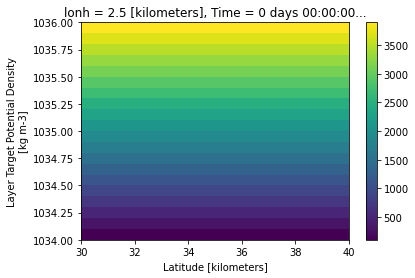

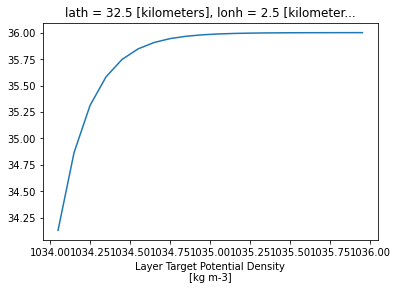

In [75]:
# make exponential profile rhotop+S*(np.exp(-((depth)/z_bot*10))-1)
IC = open_IC('icemount-layer-LSPR')
IC_S_COPY = IC.Salt.isel(lonh = 0)+IC.Salt*0
middle_depth = IC.h.cumsum('Layer')-IC.h/2 +IC.eta.isel(Interface = 0)
middle_depth.isel(lonh=0).plot()
plt.show()
IC_S_COPY = IC_S_COPY*0+33.6 - 2.4*(np.exp(-middle_depth.isel(lonh = 0)/400)-1)
IC_S_COPY.isel(Time = 0, lath = 0, lonh = 0).plot()
IC_S_COPY = IC_S_COPY.isel(Time = 0).rename('SALT')
ds_ICfile = xr.merge([IC_S_COPY.transpose("Layer","lath","lonh"), 
                      IC.Temp.isel(Time = 0).rename('PTEMP')]).drop('Time').isel(lonh = 0, lath = 0)
ds_ICfile.to_netcdf('INPUT/exponentialSalticemountlayer1D.nc')


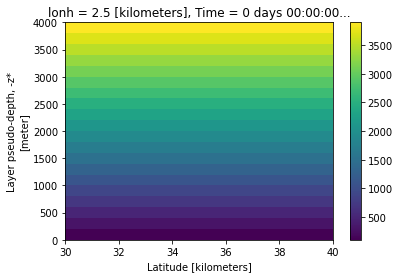

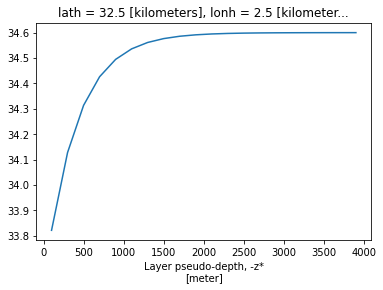

In [111]:
# make exponential profile rhotop+S*(np.exp(-((depth)/z_bot*10))-1)
IC = open_IC('icemount-z-LSPR')
IC_S_COPY = IC.Salt.isel(lonh = 0)+IC.Salt*0
middle_depth = IC.h.cumsum('Layer')-IC.h/2 +IC.eta.isel(Interface = 0)
middle_depth.isel(lonh=0).plot()
plt.show()
IC_S_COPY = IC_S_COPY*0+33.6 - 1*(np.exp(-middle_depth.isel(lonh = 0)/400)-1)
IC_S_COPY.isel(Time = 0, lath = 0, lonh = 0).plot()
IC_S_COPY = IC_S_COPY.isel(Time = 0).rename('SALT')
ds_ICfile = xr.merge([IC_S_COPY.transpose("Layer","lath","lonh"), 
                      IC.Temp.isel(Time = 0).rename('PTEMP')]).drop('Time').isel(lonh = 0, lath = 0)
ds_ICfile.to_netcdf('INPUT/exponentialSalticemountz1D.nc')


In [70]:
ds_ICfile.SALT#.isel(lath = 0).plot()

<xarray.DataArray 'SALT' (Layer: 20)>
array([34.13087812, 34.86632027, 35.31238849, 35.58294254, 35.74704186,
       35.84657313, 35.9069419 , 35.94355741, 35.96576584, 35.97923593,
       35.98740596, 35.99236133, 35.99536691, 35.99718989, 35.99829558,
       35.99896622, 35.99937298, 35.99961969, 35.99976933, 35.99986009])
Coordinates:
    lath       float64 32.5
    lonh       float64 2.5
  * Layer      (Layer) float64 1.034e+03 1.034e+03 ... 1.036e+03 1.036e+03
    Interface  float64 1.034e+03

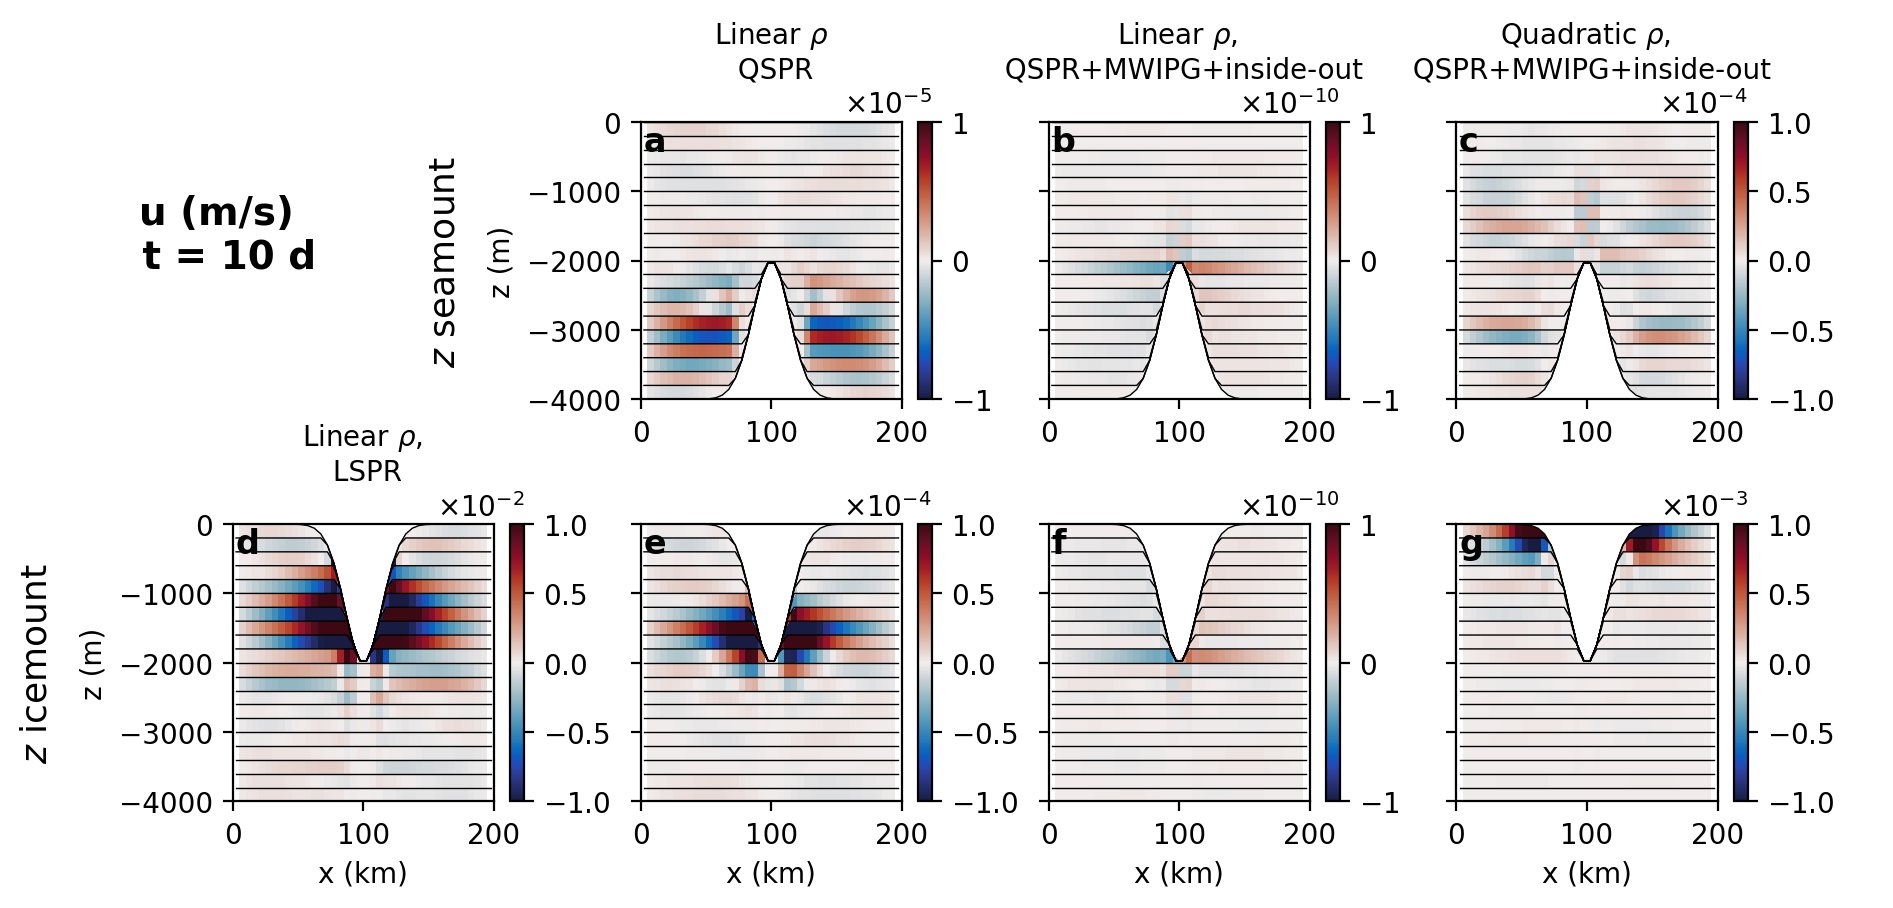

In [51]:
fig, axes = plt.subplots(ncols = 4, nrows = 2, figsize = (10,4.5),dpi = 200)
ax = np.ravel(axes)

for i in np.arange(7):

    label = ['seamount-z','seamount-z-MWIPG','seamount-z-quad-MWIPG',
              'icemount-z-LSPR','icemount-z-surfcorrect','icemount-z-reset','icemount-z-reset-quad'][i]
    loc = i+1
    vmax = [1e-5,1e-10,1e-4,
            1e-2,1e-4,1e-10,1e-3][i]
    
    a = ax[loc]

    prog = open_files(label)
    x = 0
    ymax = 4000

    plot(a,x,-1,prog.u,"uo",-vmax,vmax,cm.cm.balance,ymax)

    a.set_title('')
    if loc < 4:
        a.set_xlabel('')
    if (loc ==1):
        a.set_ylabel('z (m)')
        a.text(-150,-2000,r'$z$ seamount',
               ha = 'center', va = 'center',rotation = 90, fontsize = 13)
    elif (loc==4):
        a.set_ylabel('z (m)')
        a.text(-150,-2000,r'$z$ icemount',
               ha = 'center', va = 'center',rotation = 90, fontsize = 13)
        
    else:
        a.set_ylabel('')
        a.set_yticklabels('')
        
    if loc < 5:
        a.set_title(['',r'Linear $\rho$'+' \n QSPR',r'Linear $\rho$, '+'\n QSPR+MWIPG+inside-out',r'Quadratic $\rho$, '+'\n QSPR+MWIPG+inside-out',r'Linear $\rho$, '+'\n LSPR'][loc], 
                    y = 1.1, fontsize = 10)
    a.text(0.01,0.99,['a','b','c','d','e','f','g','h','i','j'][i], fontsize = 12, transform=a.transAxes, fontweight='bold', va='top')

    
ax[0].set_axis_off()

fig.subplots_adjust(wspace = 0.25,hspace = 0.45)
fig.suptitle('u (m/s) \n t = 10 d', fontsize = 14, y = 0.8, x = 0.12,weight = 'bold')



plt.show()


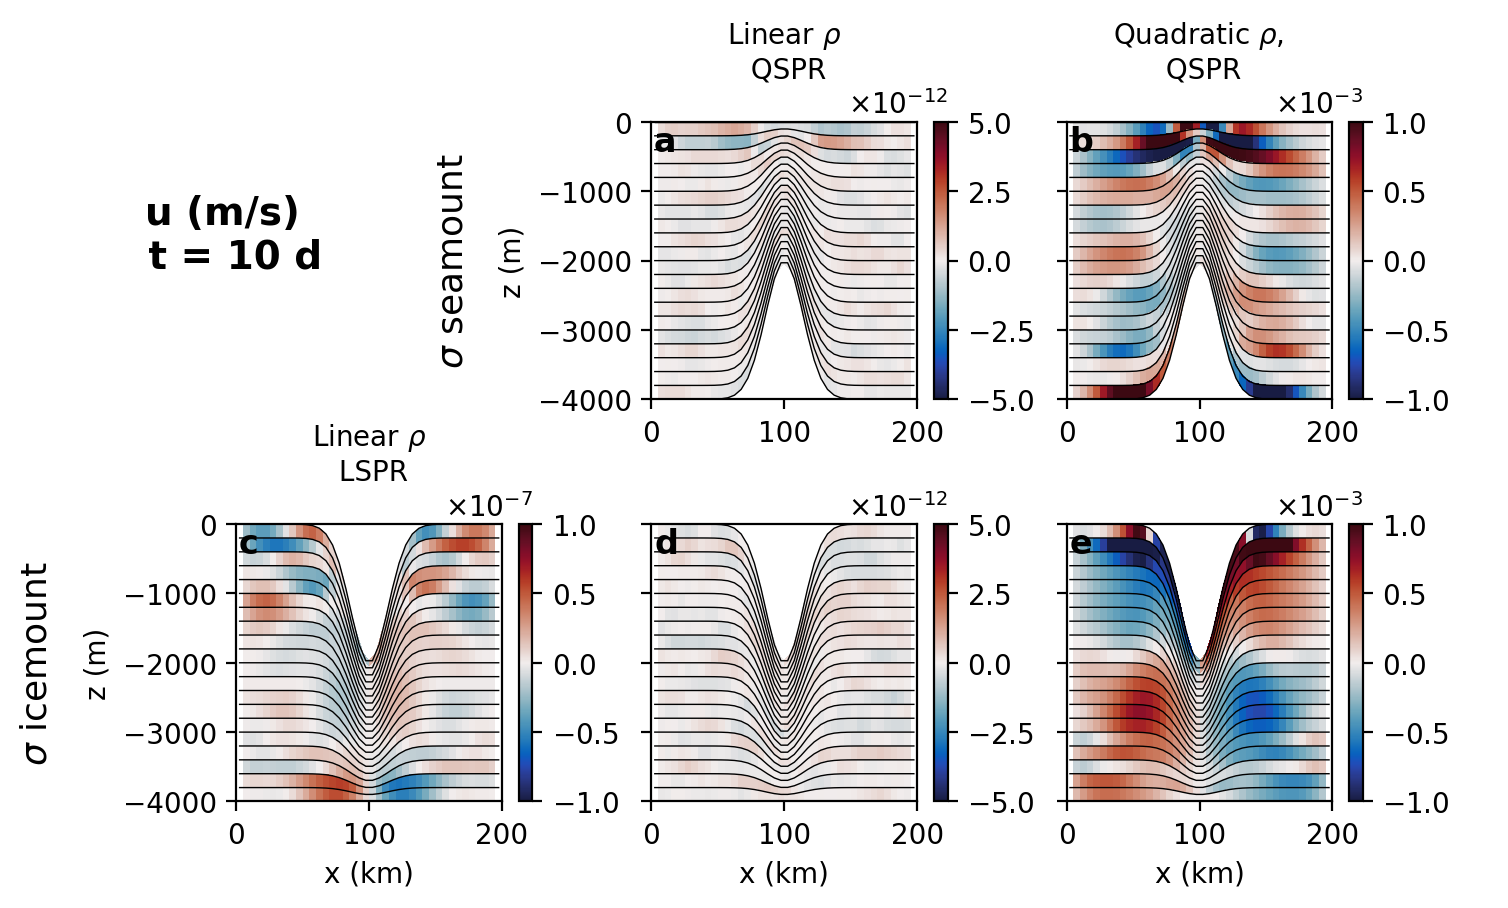

In [57]:
fig, axes = plt.subplots(ncols = 3, nrows = 2, figsize = (7.5,4.5),dpi = 200)
ax = np.ravel(axes)

for i in np.arange(5):

    label = ['seamount-sigma','seamount-sigma-quad',
              'icemount-sigma-LSPR','icemount-sigma-surfcorrect','icemount-sigma-reset-quad'][i]
    loc = [1,2,3,4,5][i]
    vmax = [5e-12,1e-3,
            1e-7,5e-12,1e-3][i]
    
    a = ax[loc]

    prog = open_files(label)
    x = 0
    ymax = 4000

    plot(a,x,-1,prog.u,"uo",-vmax,vmax,cm.cm.balance,ymax)

    a.set_title('')
    if loc < 3:
        a.set_xlabel('')
    if (loc ==1):
        a.set_ylabel('z (m)')
        a.text(-150,-2000,r'$\sigma$ seamount',
               ha = 'center', va = 'center',rotation = 90, fontsize = 13)
    elif (loc==3):
        a.set_ylabel('z (m)')
        a.text(-150,-2000,r'$\sigma$ icemount',
               ha = 'center', va = 'center',rotation = 90, fontsize = 13)
        
    else:
        a.set_ylabel('')
        a.set_yticklabels('')
        
    if loc < 4:
        a.set_title(['',r'Linear $\rho$'+' \n QSPR',r'Quadratic $\rho$, '+'\n QSPR',r'Linear $\rho$'+' \n LSPR'][loc], 
                    y = 1.1, fontsize = 10)
    a.text(0.01,0.99,['a','b','c','d','e','f','g','h','i','j'][i], fontsize = 12, transform=a.transAxes, fontweight='bold', va='top')

    
ax[0].set_axis_off()

fig.subplots_adjust(wspace = 0.25,hspace = 0.45)
fig.suptitle('u (m/s) \n t = 10 d', fontsize = 14, y = 0.8, x = 0.12,weight = 'bold')



plt.show()


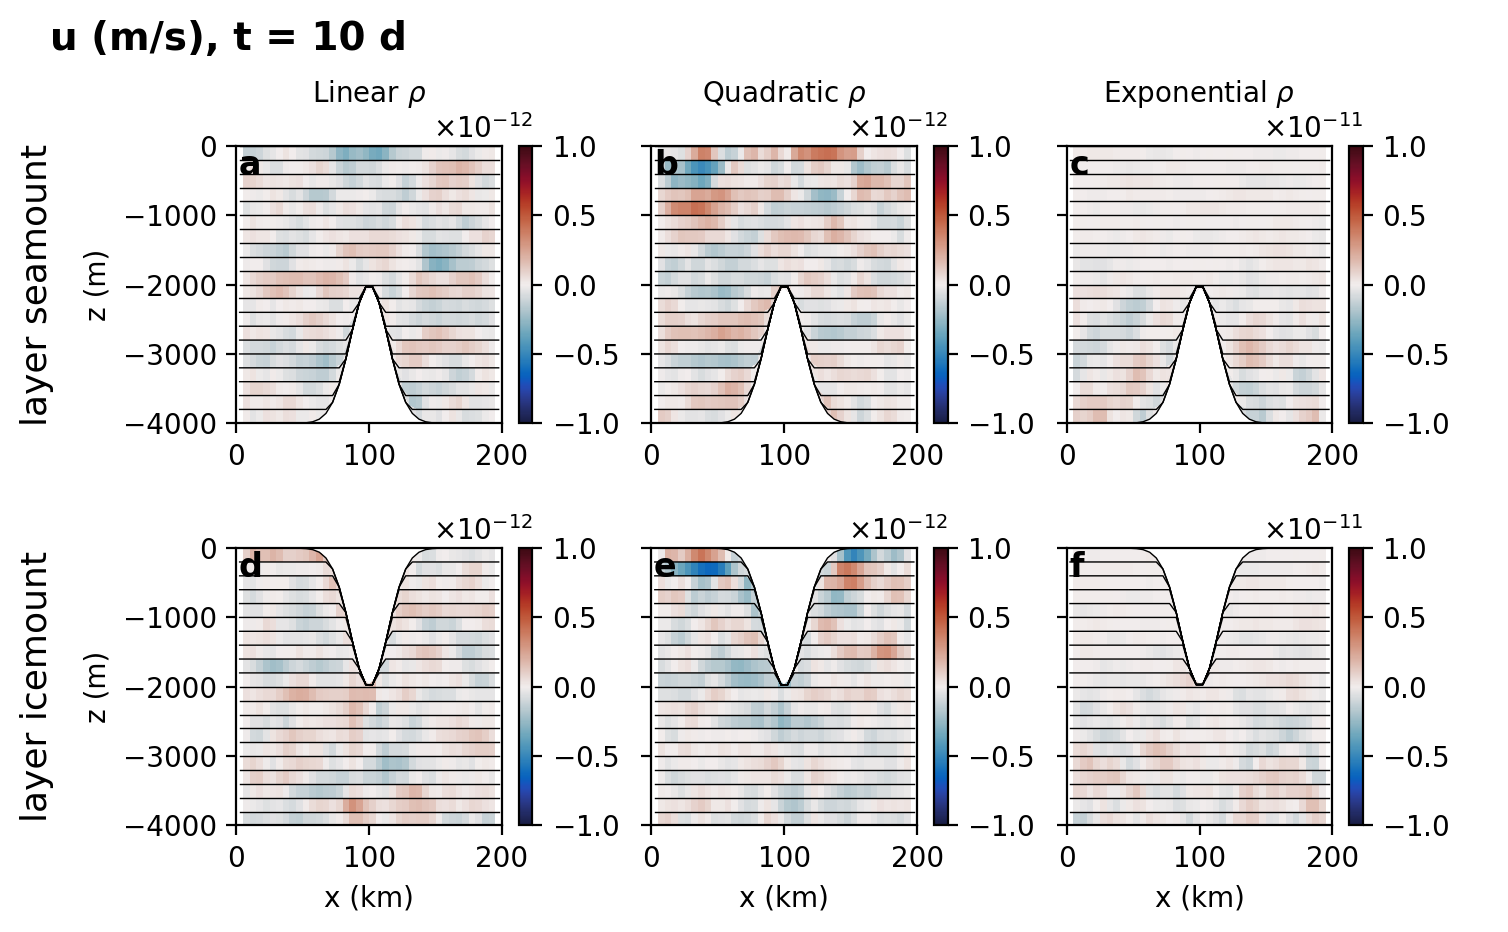

In [83]:
fig, axes = plt.subplots(ncols = 3, nrows = 2, figsize = (7.5,4.5),dpi = 200)
ax = np.ravel(axes)

for i in np.arange(6):

    label = ['seamount-layer','seamount-layer-quad','seamount-layer-exp',
              'icemount-layer-LSPR','icemount-layer-reset-quad','icemount-layer-LSPR-exp'][i]
    loc = [0,1,2,3,4,5][i]
    vmax = [1e-12,1e-12,1e-11,
            1e-12,1e-12,1e-11][i]
    
    a = ax[loc]

    prog = open_files(label)
    x = 0
    ymax = 4000

    plot(a,x,-1,prog.u,"uo",-vmax,vmax,cm.cm.balance,ymax)

    a.set_title('')
    if loc < 3:
        a.set_xlabel('')
    if (loc ==0):
        a.set_ylabel('z (m)')
        a.text(-150,-2000,r'layer seamount',
               ha = 'center', va = 'center',rotation = 90, fontsize = 13)
    elif (loc==3):
        a.set_ylabel('z (m)')
        a.text(-150,-2000,r'layer icemount',
               ha = 'center', va = 'center',rotation = 90, fontsize = 13)
        
    else:
        a.set_ylabel('')
        a.set_yticklabels('')
        
    if loc < 3:
        a.set_title([r'Linear $\rho$',r'Quadratic $\rho$',r'Exponential $\rho$'][loc], 
                    y = 1.1, fontsize = 10)
    a.text(0.01,0.99,['a','b','c','d','e','f','g','h','i','j'][i], fontsize = 12, transform=a.transAxes, fontweight='bold', va='top')

    
#ax[0].set_axis_off()

fig.subplots_adjust(wspace = 0.25,hspace = 0.45)
fig.suptitle('u (m/s), t = 10 d', fontsize = 14, y = 1.02, x = 0.12,weight = 'bold')



plt.show()


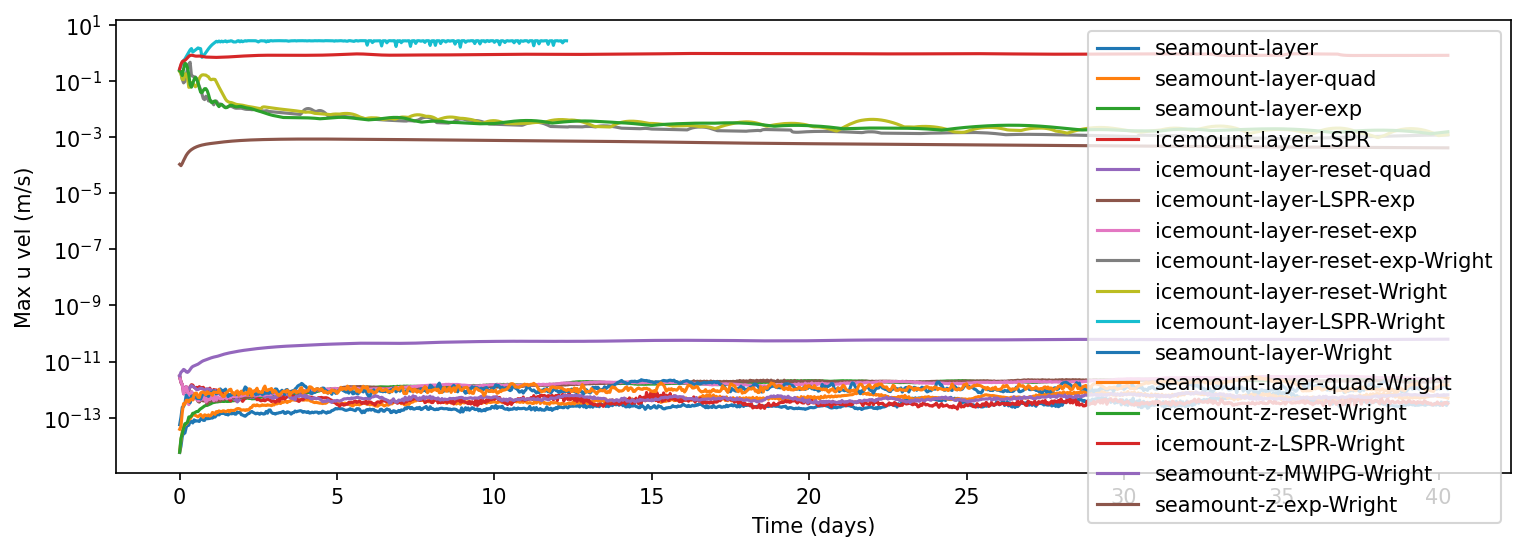

In [113]:
fig, axes = plt.subplots(figsize = (12,4),dpi = 150)

for label in ['seamount-layer','seamount-layer-quad','seamount-layer-exp',
              'icemount-layer-LSPR','icemount-layer-reset-quad','icemount-layer-LSPR-exp',
              'icemount-layer-reset-exp','icemount-layer-reset-exp-Wright','icemount-layer-reset-Wright',
             'icemount-layer-LSPR-Wright','seamount-layer-Wright','seamount-layer-quad-Wright',
             'icemount-z-reset-Wright','icemount-z-LSPR-Wright','seamount-z-MWIPG-Wright','seamount-z-exp-Wright']:


    prog = open_files(label)
    axes.plot(np.arange(len(prog.Time))/24,np.abs(prog.u).max(['zl','yh','xq']), 
                 label = label) 
axes.set_ylabel('Max u vel (m/s)')
axes.set_xlabel('Time (days)')
axes.set_yscale('log')
plt.legend(loc = 'upper right')

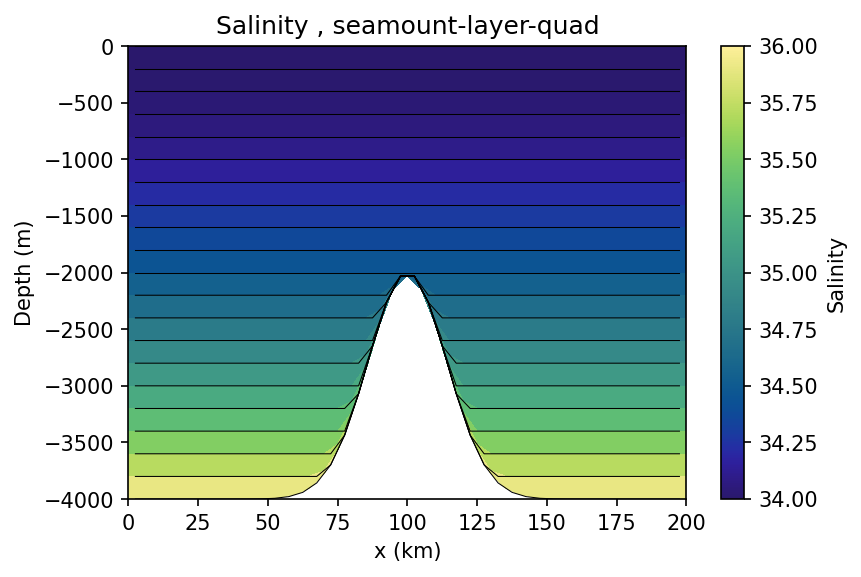

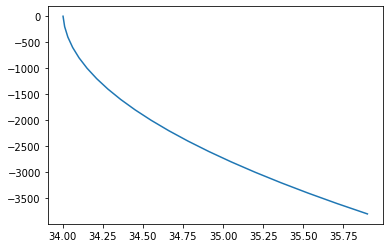

In [61]:
fig, axes = plt.subplots(dpi = 150)
label = 'seamount-layer-quad'
prog = open_files(label)
time = 0
x = 0
ymax = 4000

plot(axes,x,time,prog.salt,"Salinity",34,36,cm.cm.haline,ymax)
plt.show()
plt.plot(prog.salt.isel(Time = 0,yh = 0,xh = 0).values,prog.e.isel(Time = 0,yh = 0,xh = 0).values[:-1])


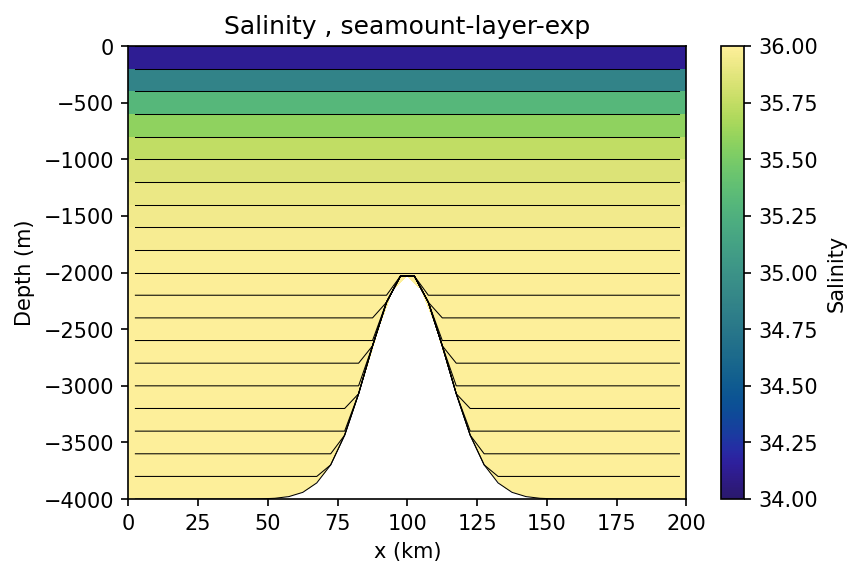

In [79]:
fig, axes = plt.subplots(dpi = 150)
label = 'seamount-layer-exp'
prog = open_files(label)
time = 0
x = 0
ymax = 4000

plot(axes,x,time,prog.salt,"Salinity",34,36,cm.cm.haline,ymax)


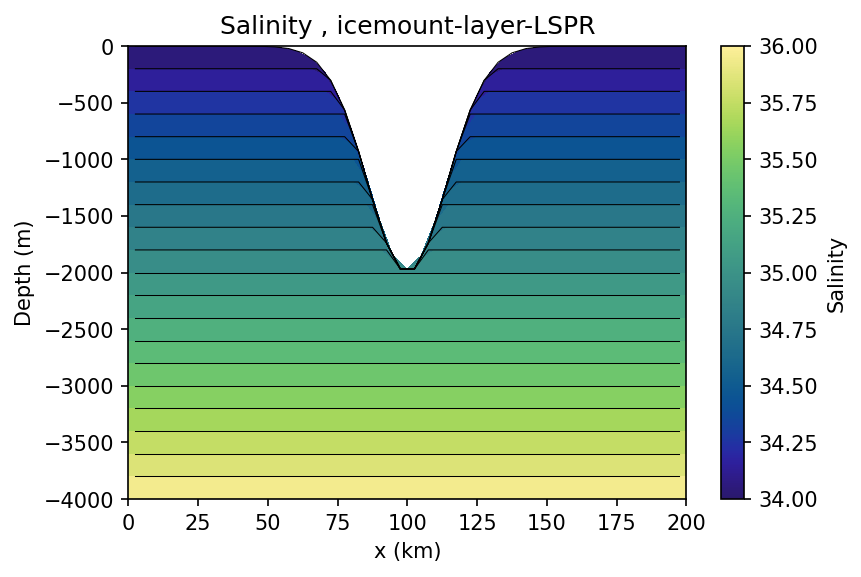

In [72]:
fig, axes = plt.subplots(dpi = 150)
label = 'icemount-layer-LSPR'
prog = open_files(label)

time = 0
x = 0
ymax = 4000

plot(axes,x,time,prog.salt,"Salinity",34,36,cm.cm.haline,ymax)


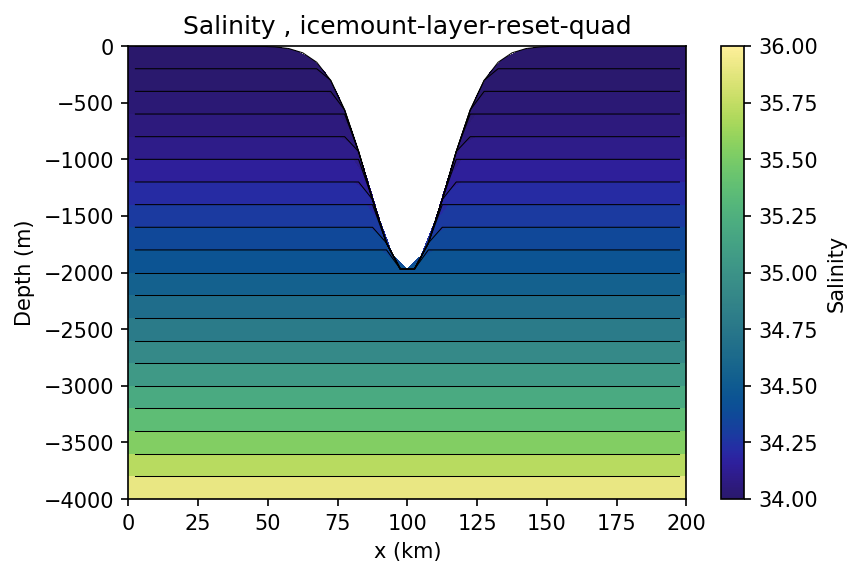

In [81]:
fig, axes = plt.subplots(dpi = 150)
label = 'icemount-layer-reset-quad'
prog = open_files(label)

time = 0
x = 0
ymax = 4000

plot(axes,x,time,prog.salt,"Salinity",34,36,cm.cm.haline,ymax)


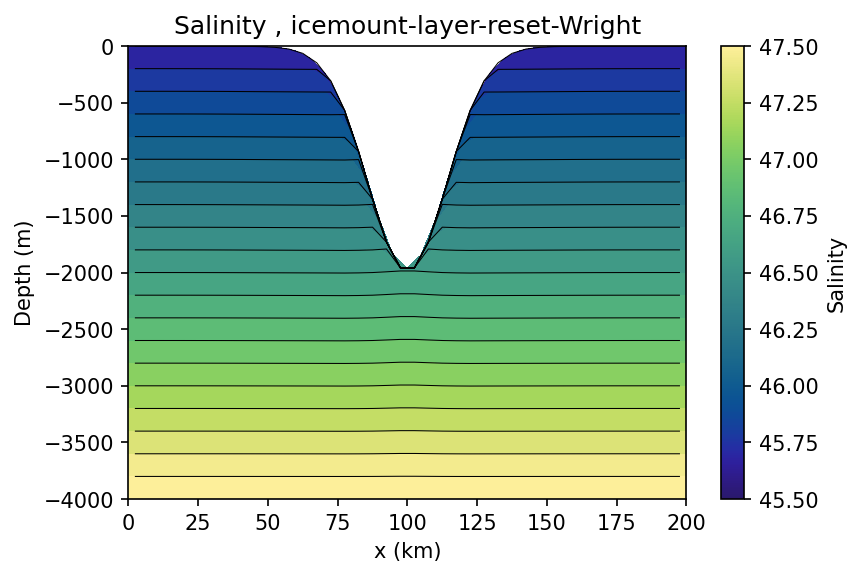

In [95]:
fig, axes = plt.subplots(dpi = 150)
label = 'icemount-layer-reset-Wright'
prog = open_files(label)

time = 0
x = 0
ymax = 4000

plot(axes,x,time,prog.salt,"Salinity",45.5,47.5,cm.cm.haline,ymax)


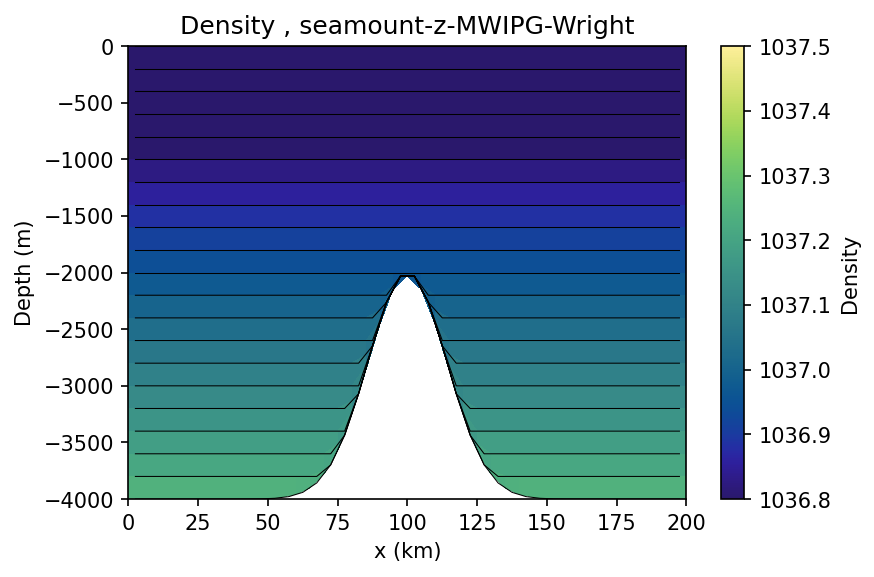

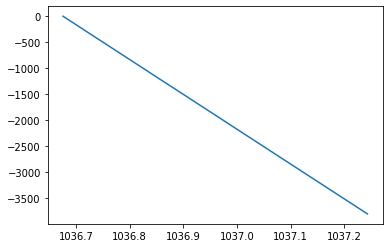

In [176]:
fig, axes = plt.subplots(dpi = 150)
label = 'seamount-z-MWIPG-Wright'
prog = open_files(label)

time = 0
x = 0
ymax = 4000

plot(axes,x,time,prog.Rml,"Density",1036.8,1037.5,cm.cm.haline,ymax)
plt.show()

plt.plot(prog.Rml.isel(Time = 0, yh = 0, xh = 0).values,prog.e.isel(Time = 0, yh = 0, xh = 0).values[:-1])

# Initialisation of layer mode with Wright EQN OF STATE?

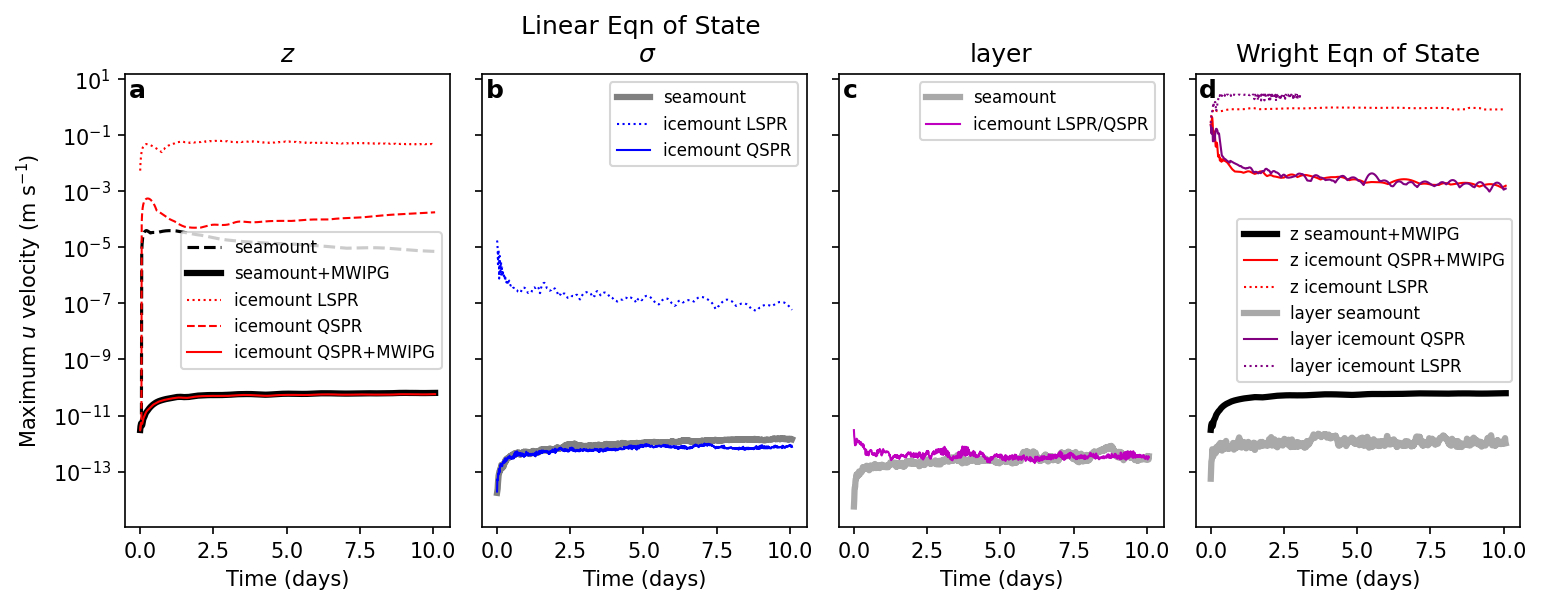

In [165]:
fig, axes = plt.subplots(ncols = 4, figsize = (12,4),dpi = 150, sharey = True)

# for label in ['seamount-layer','seamount-layer-quad','seamount-layer-exp',
#               'icemount-layer-LSPR','icemount-layer-reset-quad','icemount-layer-LSPR-exp',
#               'icemount-layer-reset-exp','icemount-layer-reset-exp-Wright','icemount-layer-reset-Wright',
#              'icemount-layer-LSPR-Wright','seamount-layer-Wright','seamount-layer-quad-Wright',
#              'icemount-z-reset-Wright','icemount-z-LSPR-Wright','seamount-z-MWIPG-Wright','seamount-z-exp-Wright']:
for i in np.arange(5):
    label = ['seamount-z','seamount-z-MWIPG',
              'icemount-z-LSPR','icemount-z-surfcorrect','icemount-z-reset'][i]
    labelplot = ['seamount','seamount+MWIPG','icemount LSPR','icemount QSPR','icemount QSPR+MWIPG'][i]
    color = ['k','k','r','r','r'][i]
    linestyle = ['--','-','dotted','--','-'][i]
    linewidth = [1.5,3,1,1,1][i]
    prog = open_files(label)
    axes[0].plot(np.arange(len(prog.Time))/24/4,np.abs(prog.u).max(['zl','yh','xq']), 
                 label = labelplot, color = color, linestyle = linestyle, linewidth = linewidth) 
axes[0].set_ylabel('Maximum $u$ velocity (m s$^{-1}$)')
axes[0].set_xlabel('Time (days)')
axes[0].set_yscale('log')
axes[0].legend(loc = 'center right', fontsize = 8)

for i in np.arange(3):
    label = ['seamount-sigma','icemount-sigma-LSPR','icemount-sigma-reset'][i]
    labelplot = ['seamount','icemount LSPR','icemount QSPR'][i]
    color = ['gray','b','b','b'][i]
    linestyle = ['-','dotted','-'][i]
    linewidth = [3,1,1,1][i]
    prog = open_files(label)
    axes[1].plot(np.arange(len(prog.Time))/24/4,np.abs(prog.u).max(['zl','yh','xq']), 
                 label = labelplot, color = color, linestyle = linestyle, linewidth = linewidth) 
#axes[0].set_ylabel('Max u vel (m/s)')
axes[1].set_xlabel('Time (days)')
#axes[0].set_yscale('log')
axes[1].legend(loc = 'upper right', fontsize = 8)

for i in np.arange(2):
    label = ['seamount-layer','icemount-layer-LSPR'][i]
    labelplot = ['seamount','icemount LSPR/QSPR'][i]
    color = ['darkgrey','m','b','b'][i]
    linestyle = ['-','-'][i]
    linewidth = [3,1,1,1][i]
    prog = open_files(label)
    axes[2].plot(np.arange(len(prog.Time))/24/4,np.abs(prog.u).max(['zl','yh','xq']), 
                 label = labelplot, color = color, linestyle = linestyle, linewidth = linewidth) 
#axes[0].set_ylabel('Max u vel (m/s)')
axes[2].set_xlabel('Time (days)')
#axes[0].set_yscale('log')
axes[2].legend(loc = 'upper right', fontsize = 8)


for i in np.arange(6):
    label = ['seamount-z-MWIPG-Wright','icemount-z-reset-Wright','icemount-z-LSPR-Wright',
             'seamount-layer-Wright','icemount-layer-reset-Wright','icemount-layer-LSPR-Wright'][i]
    labelplot = ['z seamount+MWIPG','z icemount QSPR+MWIPG','z icemount LSPR',
                 'layer seamount', 'layer icemount QSPR','layer icemount LSPR'][i]
    color = ['k','r','r','darkgrey','purple','purple'][i]
    linestyle = ['-','-','dotted','-','-','dotted',][i]
    linewidth = [3,1,1,3,1,1][i]
    prog = open_files(label)
    axes[3].plot(np.arange(len(prog.Time))/24/4,np.abs(prog.u).max(['zl','yh','xq']), 
                 label = labelplot, color = color, linestyle = linestyle, linewidth = linewidth) 
#axes[0].set_ylabel('Max u vel (m/s)')
axes[3].set_xlabel('Time (days)')
#axes[0].set_yscale('log')
axes[3].legend(loc = 'center right', fontsize = 8)

fig.subplots_adjust(wspace = 0.1)

axes[0].set_title('$z$')
axes[1].set_title('Linear Eqn of State \n $\sigma$')
axes[2].set_title('layer')
axes[3].set_title('Wright Eqn of State')

# fig.suptitle('Spurious currents in linear temperature and salinity stratification tests', fontweight = 'bold',
#             x = 0.12,ha = 'left', y = 1.06)
for i in np.arange(4):
    axes[i].text(0.01,0.99,['a','b','c','d','e','f','g','h','i','j'][i], fontsize = 12, transform=axes[i].transAxes, fontweight='bold', va='top')


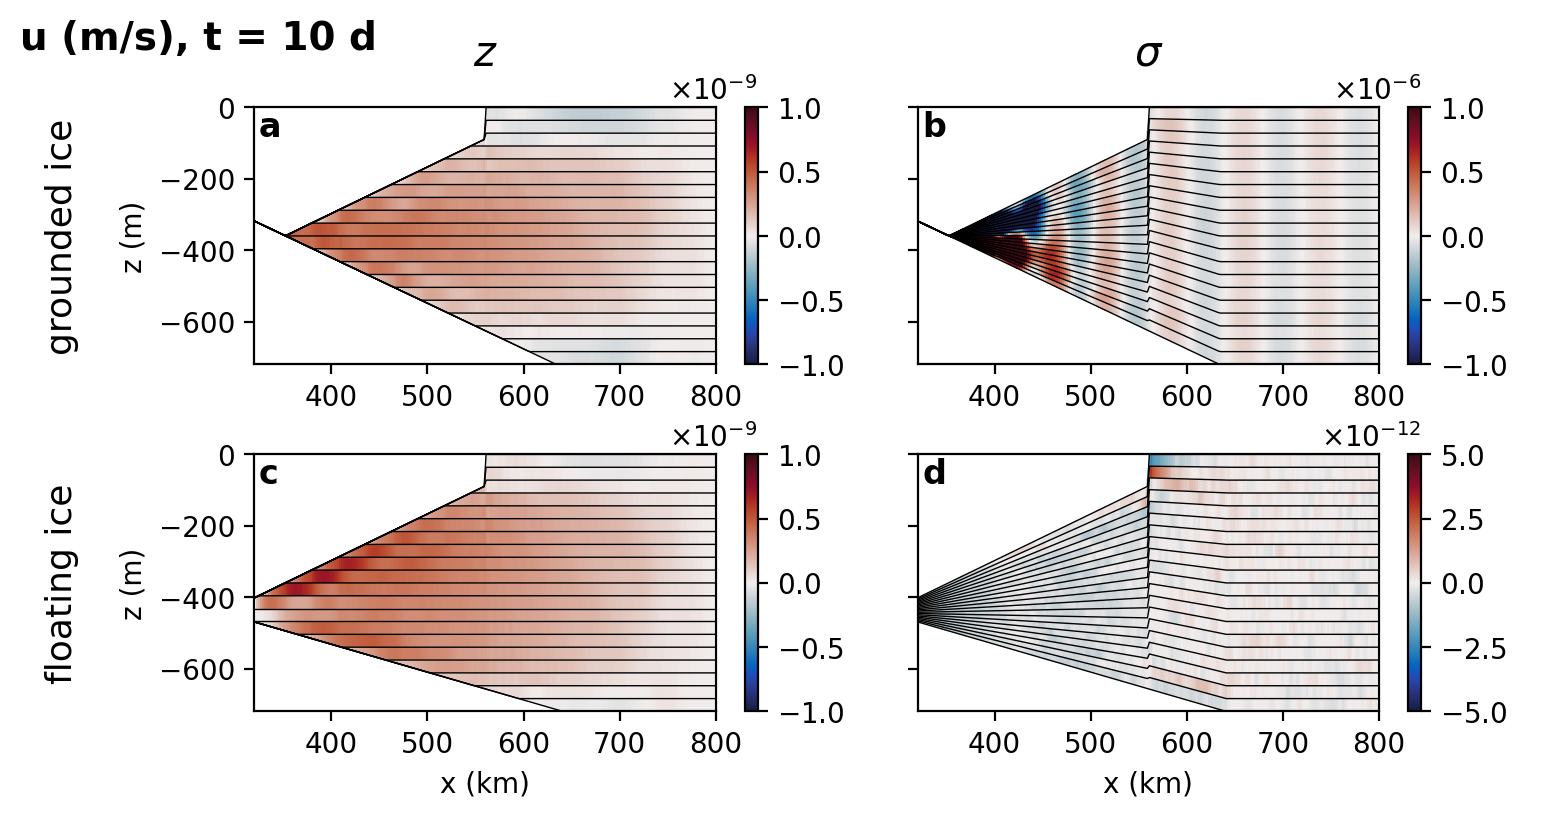

In [6]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (8,4),dpi = 200)
ax = np.ravel(axes)

for i in np.arange(4):

    label = ['iceshelf3-z','iceshelf3-sigma','iceshelf2-z','iceshelf2-sigma'][i]
    loc = [0,1,2,3][i]
    vmax = [1e-9,1e-6,
            1e-9,5e-12,1e-11][i]
    
    a = ax[loc]

    prog = open_files(label)
    x = 0
    ymax = 720

    plot(a,x,-1,prog.u,"uo",-vmax,vmax,cm.cm.balance,ymax)

    a.set_title('')
    if loc < 2:
        a.set_xlabel('')
    if (loc ==0):
        a.set_ylabel('z (m)')
        a.text(120,-360,'grounded ice',
               ha = 'center', va = 'center',rotation = 90, fontsize = 13)
    elif (loc==2):
        a.set_ylabel('z (m)')
        a.text(120,-360,'floating ice',
               ha = 'center', va = 'center',rotation = 90, fontsize = 13)
        
    else:
        a.set_ylabel('')
        a.set_yticklabels('')
        
    if loc < 2:
        a.set_title(['$z$','$\sigma$'][loc], 
                    y = 1.1, fontsize = 15)
    a.text(0.01,0.99,['a','b','c','d','e','f','g','h','i','j'][i], fontsize = 12, transform=a.transAxes, fontweight='bold', va='top')

    
#ax[0].set_axis_off()

fig.subplots_adjust(wspace = 0.15,hspace = 0.35)
fig.suptitle('u (m/s), t = 10 d', fontsize = 14, y = 0.99, x = 0.09,weight = 'bold')



plt.show()


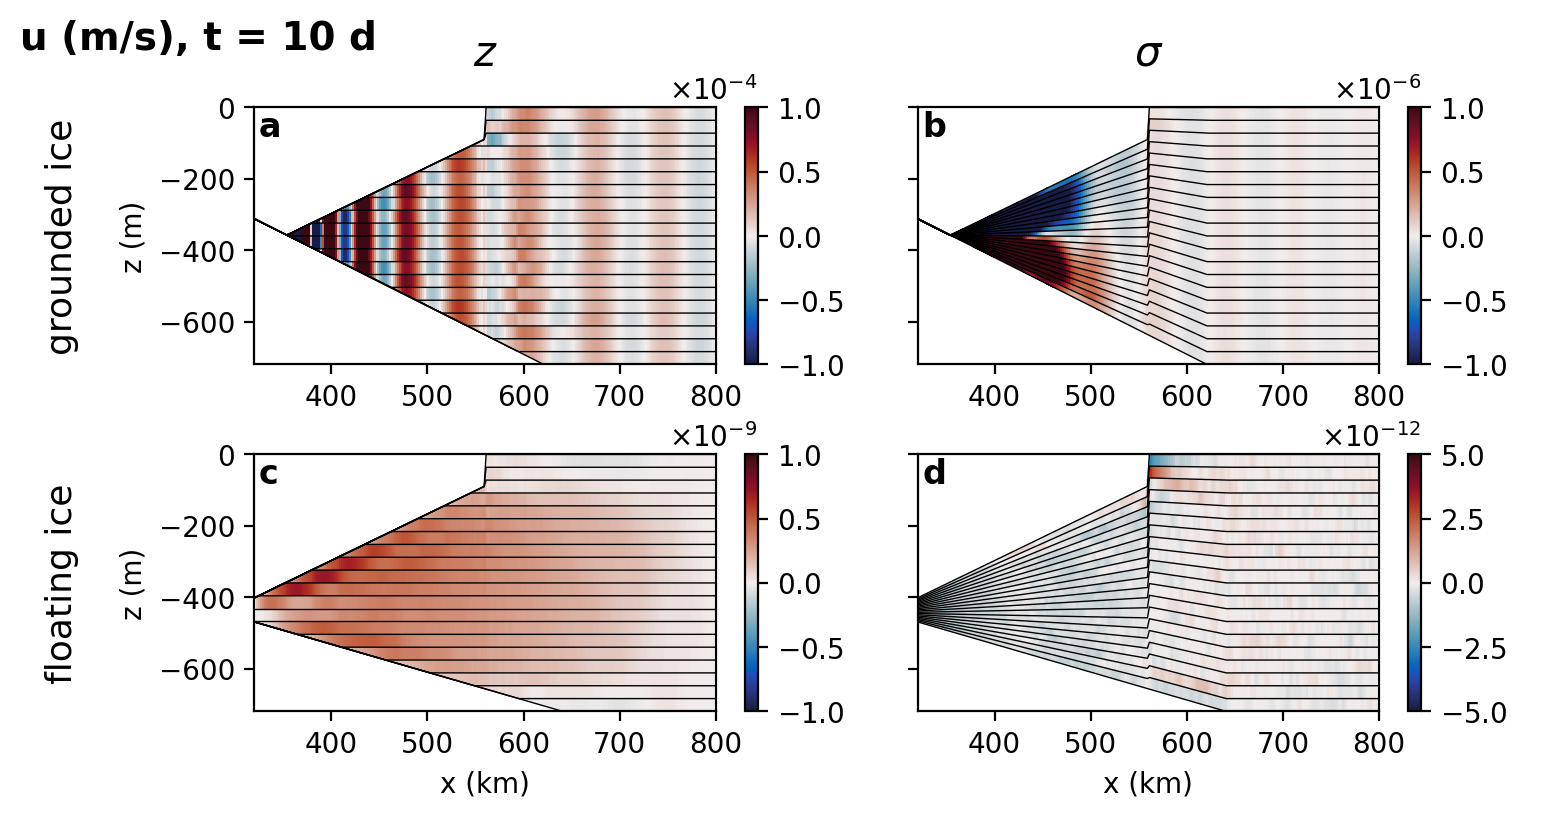

In [17]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (8,4),dpi = 200)
ax = np.ravel(axes)

for i in np.arange(4):

    label = ['iceshelf-z','iceshelf-sigma','iceshelf2-z','iceshelf2-sigma'][i]
    loc = [0,1,2,3][i]
    vmax = [1e-4,1e-6,
            1e-9,5e-12,1e-11][i]
    
    a = ax[loc]

    prog = open_files(label)
    x = 0
    ymax = 720

    plot(a,x,-1,prog.u,"uo",-vmax,vmax,cm.cm.balance,ymax)

    a.set_title('')
    if loc < 2:
        a.set_xlabel('')
    if (loc ==0):
        a.set_ylabel('z (m)')
        a.text(120,-360,'grounded ice',
               ha = 'center', va = 'center',rotation = 90, fontsize = 13)
    elif (loc==2):
        a.set_ylabel('z (m)')
        a.text(120,-360,'floating ice',
               ha = 'center', va = 'center',rotation = 90, fontsize = 13)
        
    else:
        a.set_ylabel('')
        a.set_yticklabels('')
        
    if loc < 2:
        a.set_title(['$z$','$\sigma$'][loc], 
                    y = 1.1, fontsize = 15)
    a.text(0.01,0.99,['a','b','c','d','e','f','g','h','i','j'][i], fontsize = 12, transform=a.transAxes, fontweight='bold', va='top')

    
#ax[0].set_axis_off()

fig.subplots_adjust(wspace = 0.15,hspace = 0.35)
fig.suptitle('u (m/s), t = 10 d', fontsize = 14, y = 0.99, x = 0.09,weight = 'bold')



plt.show()


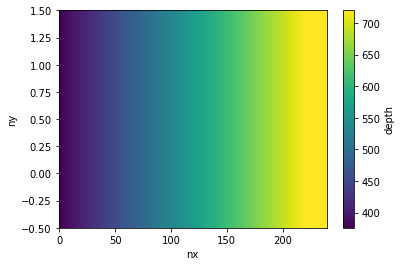

In [22]:
depth = np.zeros([2,240])
ny = np.arange(2)
nx = np.arange(240)
# create xarray dataset
ds = xr.Dataset(
    data_vars=dict(
        depth=(["ny", "nx"], depth),
    ),
#    coords=dict(
#        nx=(["nx"], nx),
#        ny=(["ny"], ny),
#    ),
    #attrs=dict(description="Depth of topography"),
)

ds2 = open_IC('iceshelf-z')
min_depth = -ds2.eta.isel(lonh = 0).max().values
ds['depth'] = (720-min_depth)/260*(ds.depth+ds.nx)+min_depth*1.5
ds['depth'] = ds.depth.where(ds.depth<720).fillna(720)

ds.depth.plot()
ds.to_netcdf('INPUT/topog_2D_shallower.nc')

[319.62448122 319.62448122]
313.35733453242636


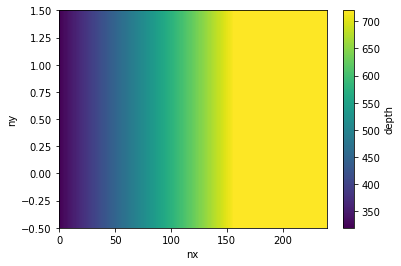

In [32]:
depth = np.zeros([2,240])
ny = np.arange(2)
nx = np.arange(240)
# create xarray dataset
ds = xr.Dataset(
    data_vars=dict(
        depth=(["ny", "nx"], depth),
    ),
#    coords=dict(
#        nx=(["nx"], nx),
#        ny=(["ny"], ny),
#    ),
    #attrs=dict(description="Depth of topography"),
)

ds2 = open_IC('iceshelf-z')
min_depth = -ds2.eta.isel(lonh = 0).min().values
ds['depth'] = (720-min_depth)/159*(ds.depth+ds.nx)+min_depth*1.02
ds['depth'] = ds.depth.where(ds.depth<720).fillna(720)
print(ds.depth.isel(nx = 0).values)
print(min_depth)
ds.depth.plot()
ds.to_netcdf('INPUT/topog_2D_shallowish.nc')

[316.49090788 316.49090788]
313.35733453242636


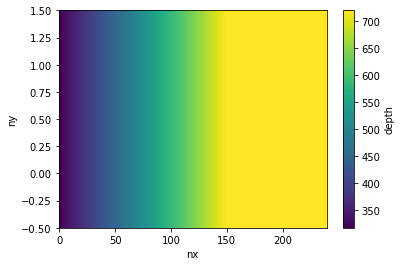

In [9]:
depth = np.zeros([2,240])
ny = np.arange(2)
nx = np.arange(240)
# create xarray dataset
ds = xr.Dataset(
    data_vars=dict(
        depth=(["ny", "nx"], depth),
    ),
#    coords=dict(
#        nx=(["nx"], nx),
#        ny=(["ny"], ny),
#    ),
    #attrs=dict(description="Depth of topography"),
)

ds2 = open_IC('iceshelf-z')
min_depth = -ds2.eta.isel(lonh = 0).min().values
ds['depth'] = (720-min_depth)/151*(ds.depth+ds.nx)+min_depth*1.01
ds['depth'] = ds.depth.where(ds.depth<720).fillna(720)
print(ds.depth.isel(nx = 0).values)
print(min_depth)
ds.depth.plot()
ds.to_netcdf('INPUT/topog_2D_shallowish2.nc')

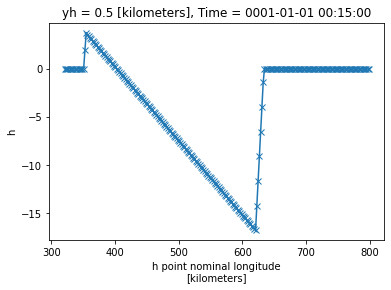

In [4]:
prog = open_files('iceshelf3-z')
prog2 = open_files('iceshelf-z')
(prog.isel(Time = 0,yh = 0).h.sum('zl')-prog2.isel(Time = 0,yh = 0).h.sum('zl')).plot(marker = 'x')


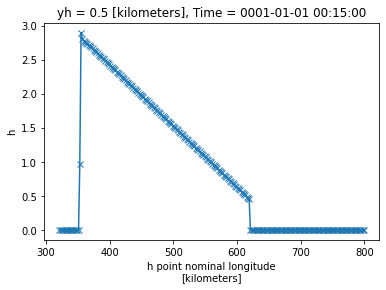

In [10]:
prog = open_files('iceshelf3-z')
prog2 = open_files('iceshelf-z')
(prog.isel(Time = 0,yh = 0).h.sum('zl')-prog2.isel(Time = 0,yh = 0).h.sum('zl')).plot(marker = 'x')


(330.0, 360.0)

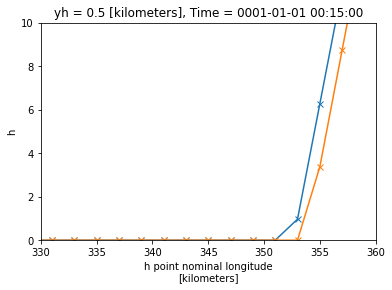

In [15]:
prog = open_files('iceshelf3-z')
prog2 = open_files('iceshelf-z')
(prog.isel(Time = 0,yh = 0).h.sum('zl')).plot(marker = 'x')
(prog2.isel(Time = 0,yh = 0).h.sum('zl')).plot(marker = 'x')

plt.ylim(0,10)
plt.xlim(330,360)

# For z coordinate grounding line: 
I seem to be able to get either a large velocity (stripes, complaining about depth going below bathymetry) or a small velocity with very minimal changes to bathymetry. Seems like it is happy if second smallest layer ~1m, but not the jump from min to 4m?